In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np

# data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('seaborn')
sns.set(font_scale=2.5)

# find NULL Data
import missingno as msno

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# dataset
df_train = pd.read_csv('./train.csv')
df_test = pd.read_csv('./test.csv')

In [3]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [6]:
# NaN data
for col in df_train.columns:
    msg = 'columns: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (df_train[col].isnull().sum() / df_train[col].shape[0]))
    print(msg)

columns: PassengerId	 Percent of NaN value: 0.00%
columns:   Survived	 Percent of NaN value: 0.00%
columns:     Pclass	 Percent of NaN value: 0.00%
columns:       Name	 Percent of NaN value: 0.00%
columns:        Sex	 Percent of NaN value: 0.00%
columns:        Age	 Percent of NaN value: 19.87%
columns:      SibSp	 Percent of NaN value: 0.00%
columns:      Parch	 Percent of NaN value: 0.00%
columns:     Ticket	 Percent of NaN value: 0.00%
columns:       Fare	 Percent of NaN value: 0.00%
columns:      Cabin	 Percent of NaN value: 77.10%
columns:   Embarked	 Percent of NaN value: 0.22%


In [7]:
# NaN data
for col in df_test.columns:
    msg = 'columns: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (df_test[col].isnull().sum() / df_test[col].shape[0]))
    print(msg)

columns: PassengerId	 Percent of NaN value: 0.00%
columns:     Pclass	 Percent of NaN value: 0.00%
columns:       Name	 Percent of NaN value: 0.00%
columns:        Sex	 Percent of NaN value: 0.00%
columns:        Age	 Percent of NaN value: 20.57%
columns:      SibSp	 Percent of NaN value: 0.00%
columns:      Parch	 Percent of NaN value: 0.00%
columns:     Ticket	 Percent of NaN value: 0.00%
columns:       Fare	 Percent of NaN value: 0.24%
columns:      Cabin	 Percent of NaN value: 78.23%
columns:   Embarked	 Percent of NaN value: 0.00%


<AxesSubplot:>

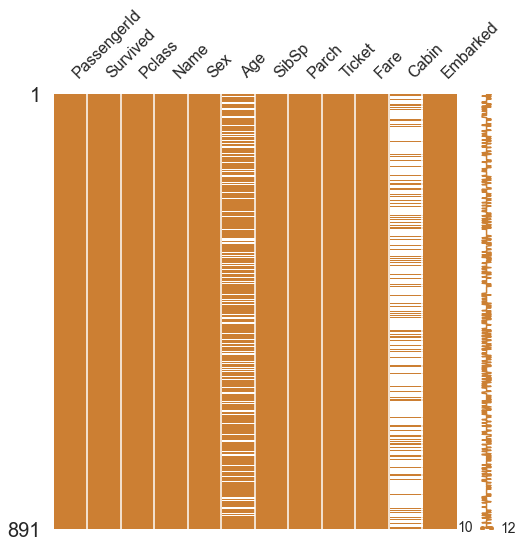

In [8]:
msno.matrix(df=df_train.iloc[:, :], figsize=(8, 8), color=(0.8, 0.5, 0.2))

<AxesSubplot:>

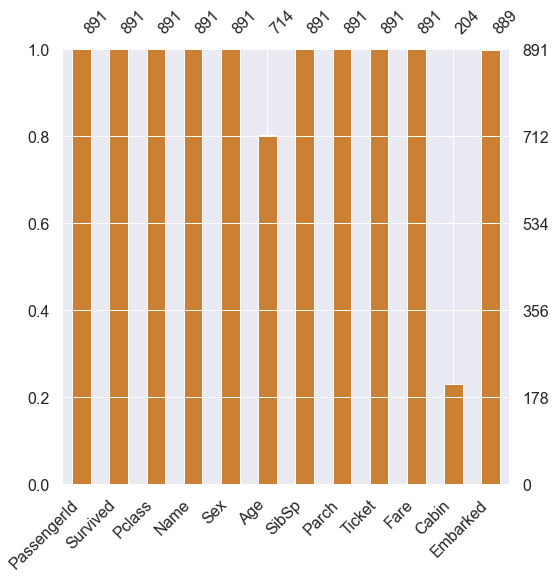

In [9]:
msno.bar(df=df_train.iloc[:, :], figsize=(8, 8), color=(0.8, 0.5, 0.2))

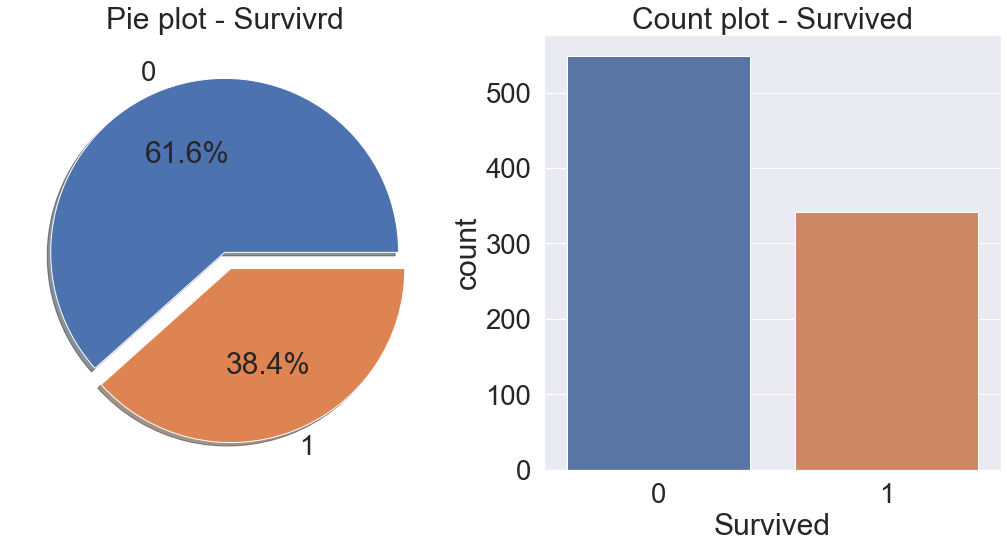

In [10]:
f, ax = plt.subplots(1,2,figsize=(18,8))

df_train['Survived'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.1f%%',ax=ax[0], shadow=True)
ax[0].set_title('Pie plot - Survivrd')
ax[0].set_ylabel('')
sns.countplot('Survived', data=df_train, ax=ax[1])
ax[1].set_title('Count plot - Survived')
plt.show()

### EDA란?
수집한 데이터가 들어왔을 때, 이를 다양한 각도에서 관찰하고 이해하는 과정이다. 한마디로 데이터를 분석하기 전에 그래프나 통계적인 방법으로 자료를 직관적으로 바라보는 과정이다.

### Pclass


In [11]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).count()

,Survived
Pclass,
1,216
2,184
3,491


In [12]:
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins=True)

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


<AxesSubplot:xlabel='Pclass'>

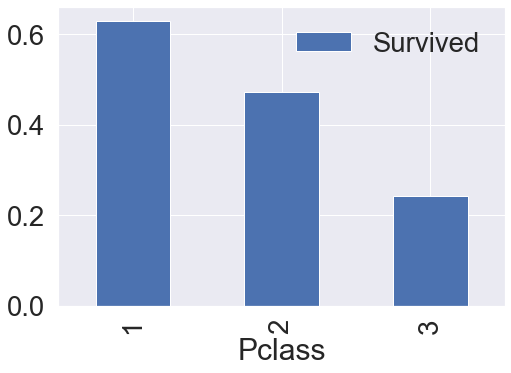

In [13]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar()

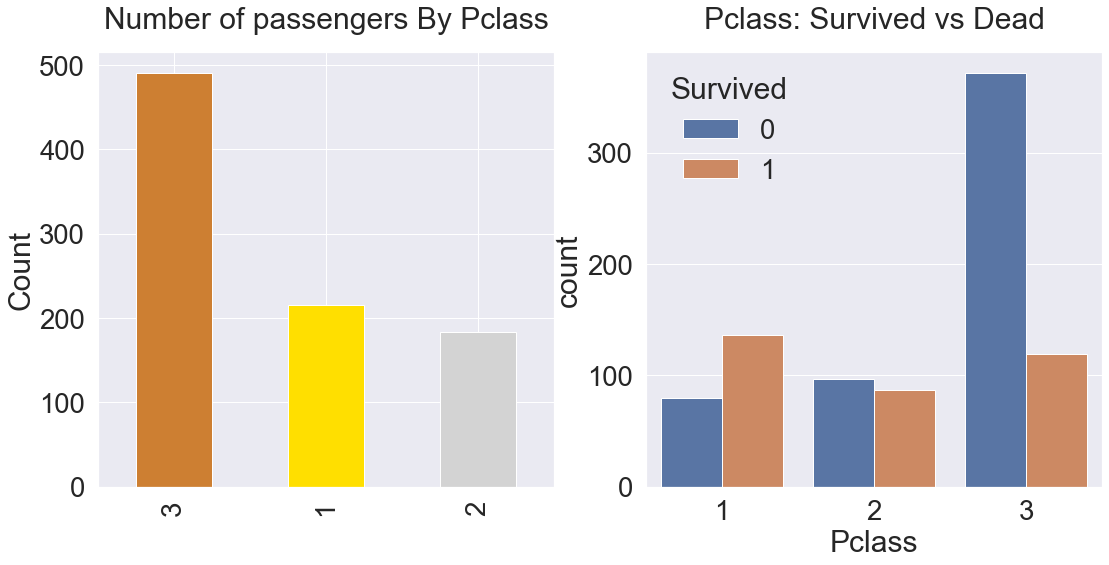

In [14]:
y_position = 1.04
f, ax = plt.subplots(1, 2, figsize=(18, 8))
df_train['Pclass'].value_counts().plot.bar(color=['#CD7F32', '#FFDF00', '#D3D3D3'], ax=ax[0])
ax[0].set_title('Number of passengers By Pclass', y=y_position)
ax[0].set_ylabel('Count')
sns.countplot('Pclass', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Pclass: Survived vs Dead', y=y_position)
plt.show()

### Sex

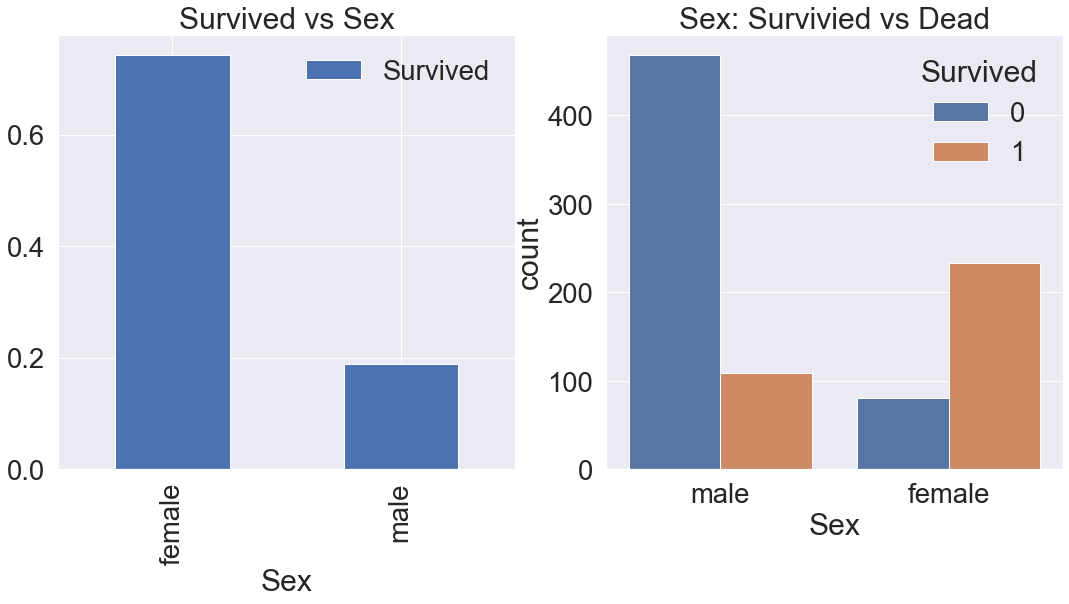

In [15]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Sex: Survivied vs Dead')
plt.show()

In [16]:
pd.crosstab(df_train['Sex'], df_train['Survived'], margins=True)

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


### Sex and Pclass

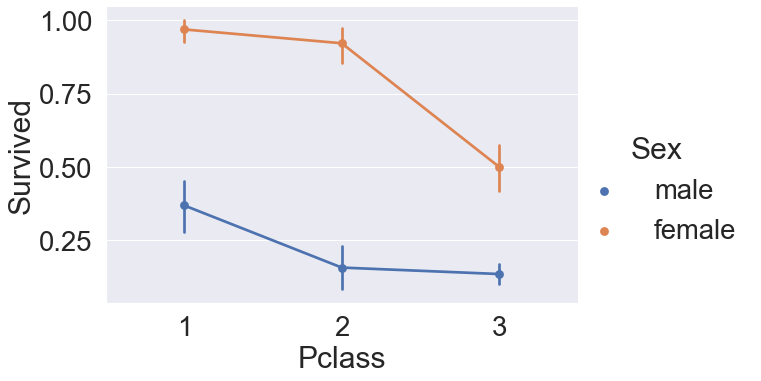

In [17]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data=df_train, size=6, aspect=1.5)

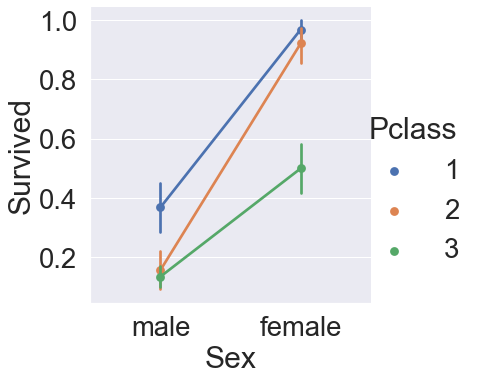

In [18]:
sns.factorplot('Sex', 'Survived', hue='Pclass',data=df_train, saturation=5, size=6, aspect=1)

### Age


In [19]:
print('제일 나이 많은 탑승객 : {:.1f} years'.format(df_train['Age'].max()))
print('제일 나이 적은 탑승객 : {:.1f} years'.format(df_train['Age'].min()))
print('탑승객 평균 나이 : {:.1f} years'.format(df_train['Age'].mean()))

제일 나이 많은 탑승객 : 80.0 years
제일 나이 적은 탑승객 : 0.4 years
탑승객 평균 나이 : 29.7 years


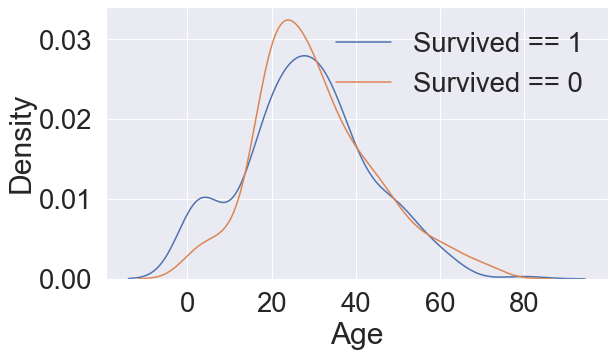

In [20]:
# 분포 그래프
fig, ax = plt.subplots(1, 1, figsize=(9, 5))
sns.kdeplot(df_train[df_train['Survived'] == 1]['Age'], ax=ax)
sns.kdeplot(df_train[df_train['Survived'] == 0]['Age'], ax=ax)
plt.legend(['Survived == 1', 'Survived == 0'])
plt.show()

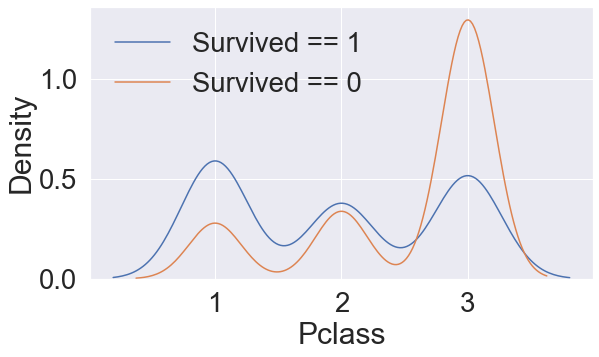

In [21]:
# 분포 그래프
fig, ax = plt.subplots(1, 1, figsize=(9, 5))
sns.kdeplot(df_train[df_train['Survived'] == 1]['Pclass'], ax=ax)
sns.kdeplot(df_train[df_train['Survived'] == 0]['Pclass'], ax=ax)
plt.legend(['Survived == 1', 'Survived == 0'])
plt.show()

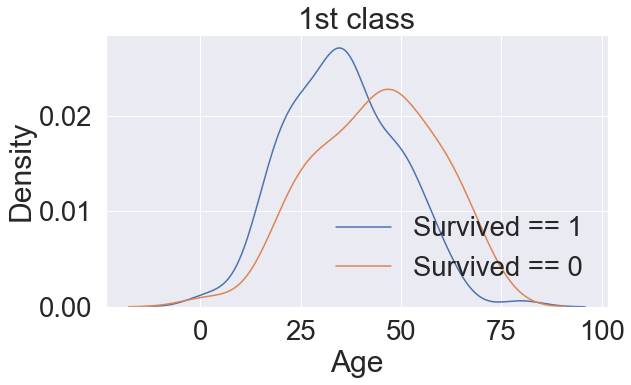

In [22]:
# 분포 그래프
fig, ax = plt.subplots(1, 1, figsize=(9, 5))
sns.kdeplot(df_train[(df_train['Survived'] == 1) & (df_train['Pclass'] == 1)]['Age'], ax=ax)
sns.kdeplot(df_train[(df_train['Survived'] == 0) & (df_train['Pclass'] == 1)]['Age'], ax=ax)
plt.legend(['Survived == 1', 'Survived == 0'])
plt.title('1st class')
plt.show()

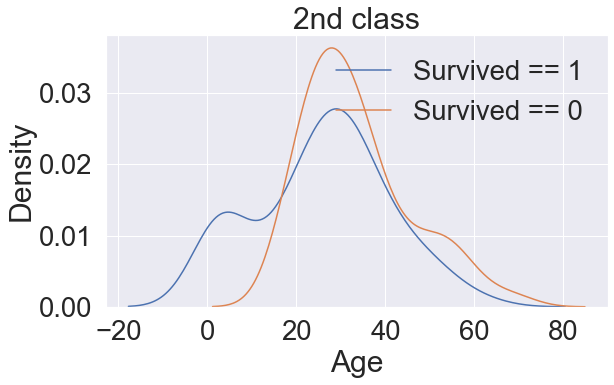

In [23]:
# 분포 그래프
fig, ax = plt.subplots(1, 1, figsize=(9, 5))
sns.kdeplot(df_train[(df_train['Survived'] == 1) & (df_train['Pclass'] == 2)]['Age'], ax=ax)
sns.kdeplot(df_train[(df_train['Survived'] == 0) & (df_train['Pclass'] == 2)]['Age'], ax=ax)
plt.legend(['Survived == 1', 'Survived == 0'])
plt.title('2nd class')
plt.show()

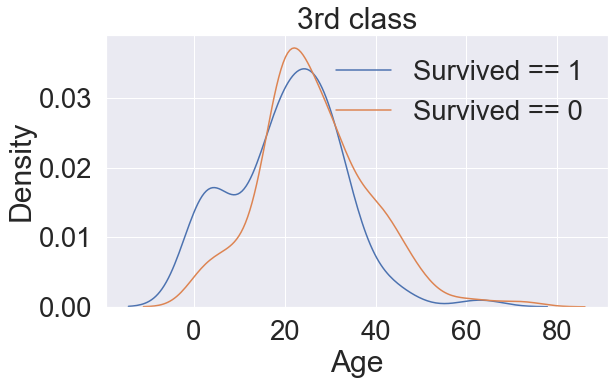

In [24]:
# 분포 그래프
fig, ax = plt.subplots(1, 1, figsize=(9, 5))
sns.kdeplot(df_train[(df_train['Survived'] == 1) & (df_train['Pclass'] == 3)]['Age'], ax=ax)
sns.kdeplot(df_train[(df_train['Survived'] == 0) & (df_train['Pclass'] == 3)]['Age'], ax=ax)
plt.legend(['Survived == 1', 'Survived == 0'])
plt.title('3rd class')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

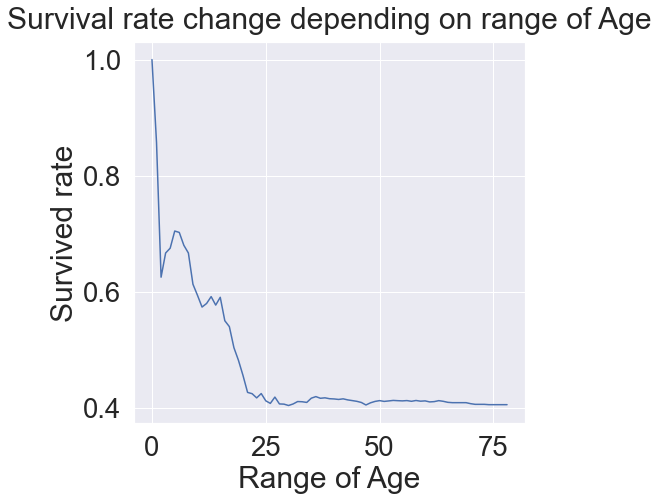

In [25]:
change_age_range_survival_ratio = []

for i in range(1, 80):
    change_age_range_survival_ratio.append(df_train[df_train['Age'] < i]['Survived'].sum() / len(df_train[df_train['Age'] < i]['Survived']))
    
plt.figure(figsize=(7,7))
plt.plot(change_age_range_survival_ratio)
plt.title('Survival rate change depending on range of Age', y=1.02)
plt.ylabel('Survived rate')
plt.xlabel('Range of Age')
plt.show 

### Pclass, Sex, Age

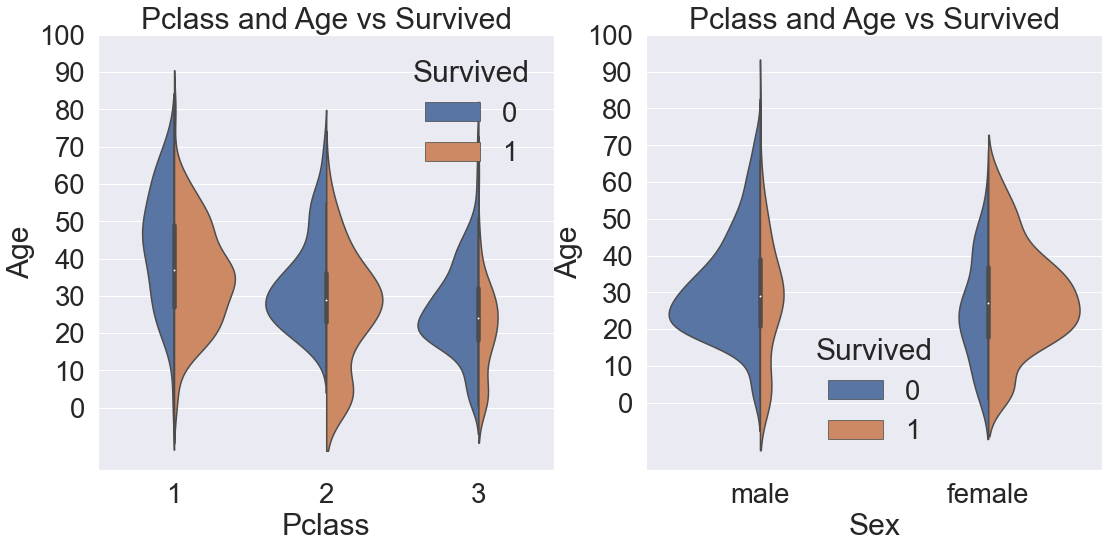

In [26]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
sns.violinplot('Pclass', 'Age', hue='Survived', data=df_train, scale='count', split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0, 110, 10))

sns.violinplot('Sex', 'Age', hue='Survived', data=df_train, scale='count', split=True, ax=ax[1])
ax[1].set_title('Pclass and Age vs Survived')
ax[1].set_yticks(range(0, 110, 10))
plt.show()

### Embarked

<AxesSubplot:xlabel='Embarked'>

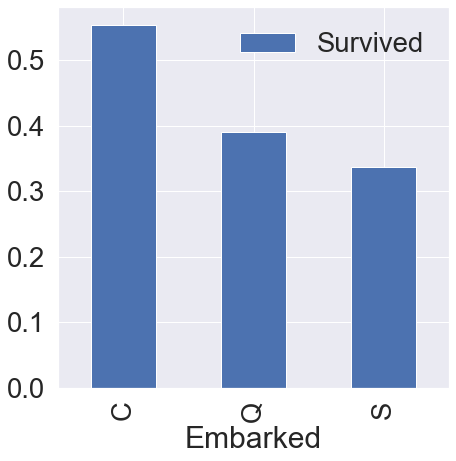

In [27]:
f, ax = plt.subplots(1, 1, figsize=(7, 7))
df_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax)

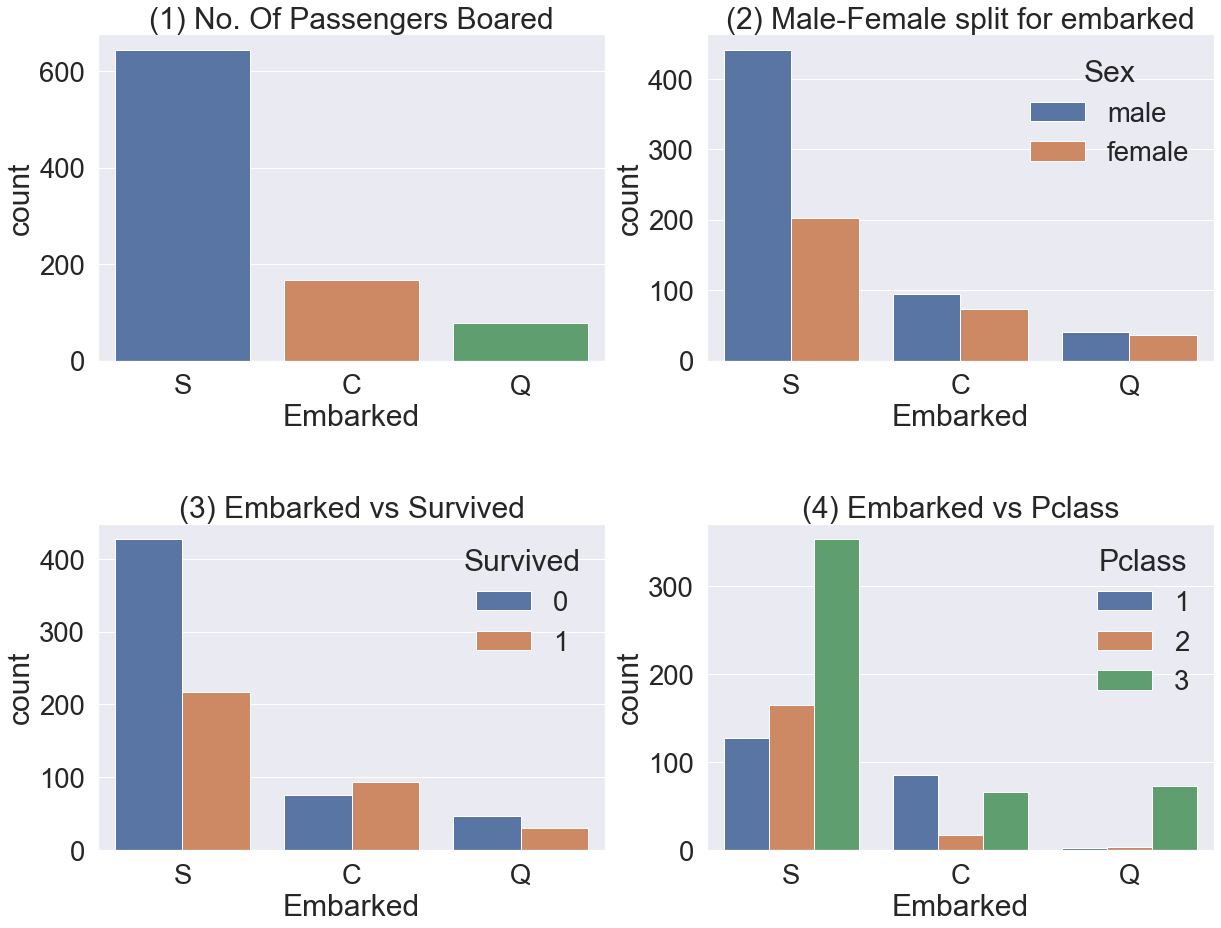

In [28]:
f, ax = plt.subplots(2, 2, figsize=(20, 15))
sns.countplot('Embarked', data=df_train, ax=ax[0, 0])
ax[0, 0].set_title('(1) No. Of Passengers Boared')

sns.countplot('Embarked', hue='Sex', data=df_train, ax=ax[0, 1])
ax[0, 1].set_title('(2) Male-Female split for embarked')

sns.countplot('Embarked', hue='Survived', data=df_train, ax=ax[1, 0])
ax[1, 0].set_title('(3) Embarked vs Survived')

sns.countplot('Embarked', hue='Pclass', data=df_train, ax=ax[1, 1])
ax[1, 1].set_title('(4) Embarked vs Pclass')

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

### Family - SibSp + Parch

In [29]:
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1

In [30]:
print('Maxium size of Family: ', df_train['FamilySize'].max())
print('Minium size of Family: ', df_train['FamilySize'].min())

Maxium size of Family:  11
Minium size of Family:  1


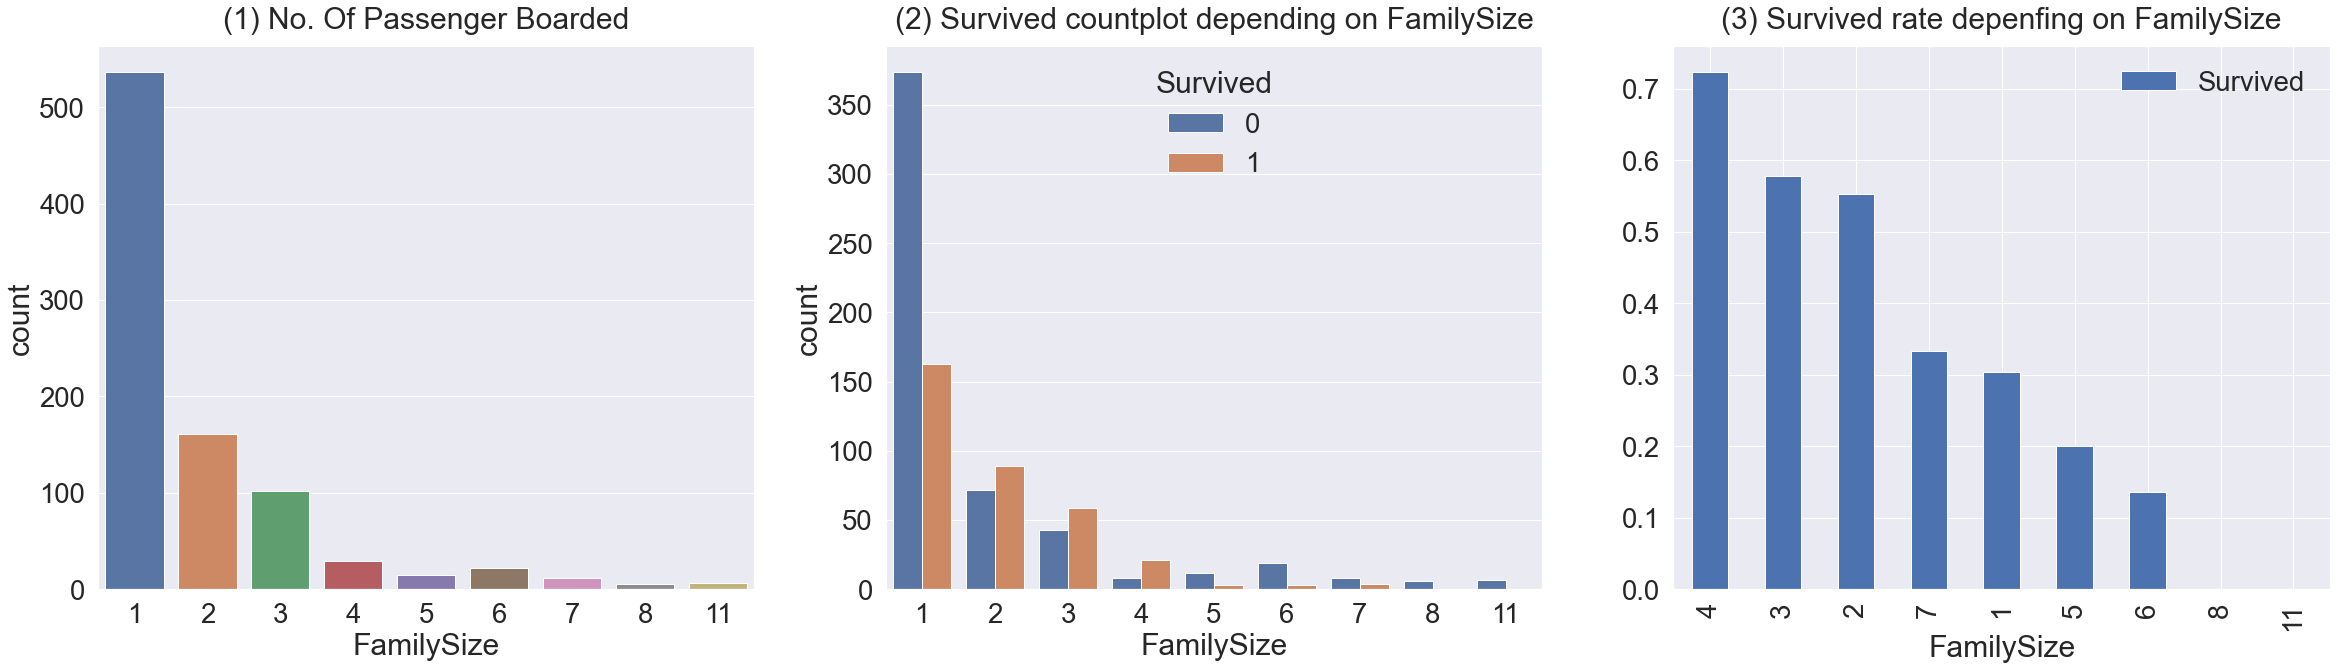

In [31]:
f, ax = plt.subplots(1, 3, figsize=(40, 10))
sns.countplot('FamilySize', data=df_train, ax=ax[0])
ax[0].set_title('(1) No. Of Passenger Boarded', y=1.02)

sns.countplot('FamilySize', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('(2) Survived countplot depending on FamilySize', y=1.02)

df_train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax[2])
ax[2].set_title('(3) Survived rate depenfing on FamilySize', y=1.02)

plt.subplots_adjust(wspace=0.2, hspace=0.5)

### Fare

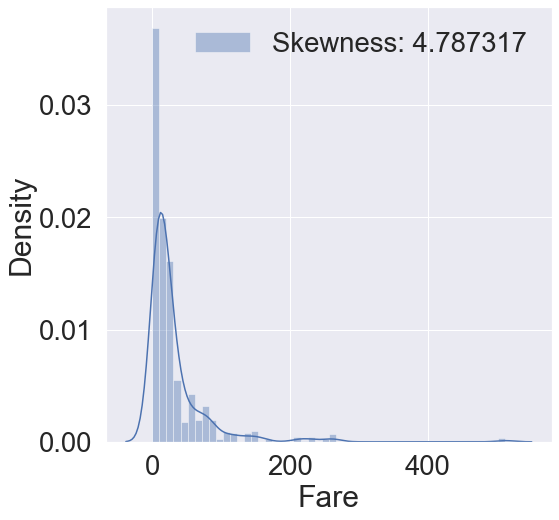

In [32]:
f, ax = plt.subplots(1, 1, figsize=(8, 8))
g = sns.distplot(df_train['Fare'], color='b', label='Skewness: {:2f}'.format(df_train['Fare'].skew()), ax=ax)
g.legend(loc='best')

In [33]:
df_train['Fare'] = df_train['Fare'].map(lambda i: np.log(i) if i>0 else 0)

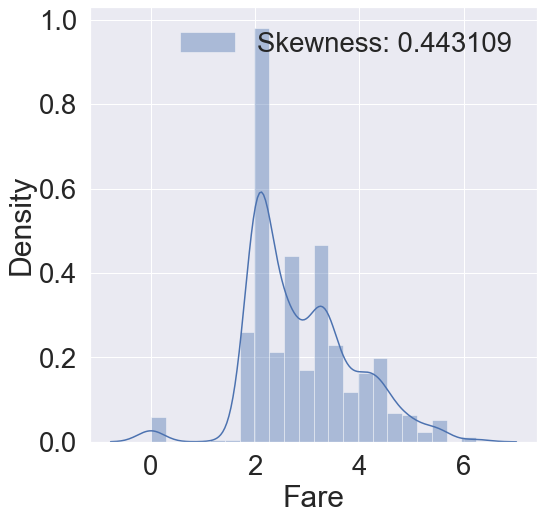

In [34]:
f, ax = plt.subplots(1, 1, figsize=(8, 8))
g = sns.distplot(df_train['Fare'], color='b', label='Skewness: {:2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

In [35]:
df_train['Ticket'].value_counts()

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64

### Feature engineering
The process of selecting, manipulating, and transforming raw data into features. <br>
Create and select columns to machine learning.

In [36]:
df_train['Inital'] = df_train['Name'].str.extract('([A-Za-z]+)\.')
df_test['Inital'] = df_test['Name'].str.extract('([A-Za-z]+)\.')

In [37]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Inital
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.981001,NaN,S,2,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,C85,C,2,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.070022,NaN,S,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.972177,C123,S,2,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.085672,NaN,S,1,Mr


In [38]:
pd.crosstab(df_train['Inital'], df_train['Sex']).T.style.background_gradient(cmap='summer_r')

Inital,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [39]:
df_train['Inital'].replace(['Capt', 'Col', 'Countess', 'Don', 'Dr', 'Jonkheer', 'Lady', 'Major', 'Master', 'Miss', 'Mlle', 'Mme', 'Mr', 'Mrs', 'Ms', 'Rev', 'Sir'],
                          ['Mr', 'Other', 'Mrs', 'Mr', 'Mr', 'Other', 'Mrs', 'Mr', 'Mr', 'Miss', 'Miss', 'Miss', 'Mr', 'Mrs', 'Miss', 'Other', 'Mr'], inplace=True)

df_test['Inital'].replace(['Capt', 'Col', 'Countess', 'Don', 'Dr', 'Jonkheer', 'Lady', 'Major', 'Master', 'Miss', 'Mlle', 'Mme', 'Mr', 'Mrs', 'Ms', 'Rev', 'Sir'],
                          ['Mr', 'Other', 'Mrs', 'Mr', 'Mr', 'Other', 'Mrs', 'Mr', 'Mr', 'Miss', 'Miss', 'Miss', 'Mr', 'Mrs', 'Miss', 'Other', 'Mr'], inplace=True)

In [40]:
df_train.groupby('Inital').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
Inital,,,,,,,,
Miss,411.741935,0.704301,2.284946,21.860000,0.698925,0.537634,3.123713,2.236559
Mr,453.005272,0.191564,2.398946,30.461056,0.434095,0.237258,2.699957,1.671353
Mrs,456.393701,0.795276,1.984252,35.981818,0.692913,0.818898,3.443751,2.511811
Other,564.444444,0.111111,1.666667,45.888889,0.111111,0.111111,2.641605,1.222222


<AxesSubplot:xlabel='Inital'>

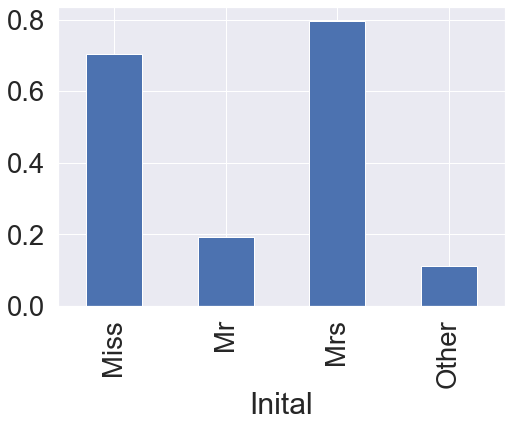

In [41]:
df_train.groupby('Inital')['Survived'].mean().plot.bar()

In [42]:
df_all = pd.concat([df_train, df_test])
df_all

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Inital
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.981001,NaN,S,2.0,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,C85,C,2.0,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.070022,NaN,S,1.0,Miss
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.972177,C123,S,2.0,Mrs
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.085672,NaN,S,1.0,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.050000,NaN,S,NaN,Mr
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.900000,C105,C,NaN,Dona
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.250000,NaN,S,NaN,Mr
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.050000,NaN,S,NaN,Mr


In [43]:
df_all.reset_index(drop=True)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Inital
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.981001,NaN,S,2.0,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,C85,C,2.0,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.070022,NaN,S,1.0,Miss
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.972177,C123,S,2.0,Mrs
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.085672,NaN,S,1.0,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.050000,NaN,S,NaN,Mr
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.900000,C105,C,NaN,Dona
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.250000,NaN,S,NaN,Mr
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.050000,NaN,S,NaN,Mr


In [44]:
df_all.groupby('Inital').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
Inital,,,,,,,,
Dona,1306.000000,NaN,1.000000,39.000000,0.000000,0.000000,108.900000,NaN
Miss,616.992453,0.704301,2.332075,21.834533,0.652830,0.494340,14.021188,2.236559
Mr,658.054152,0.191564,2.382671,30.325201,0.416366,0.249097,10.284504,1.671353
Mrs,685.673367,0.795276,1.929648,37.034884,0.658291,0.824121,23.896996,2.511811
Other,714.923077,0.111111,1.615385,44.923077,0.230769,0.153846,24.523034,1.222222


In [45]:
df_train.loc[(df_train['Age'].isnull()) & (df_train['Inital'] == 'Mr'), 'Age'] = 30
df_train.loc[(df_train['Age'].isnull()) & (df_train['Inital'] == 'Mrs'), 'Age'] = 37
df_train.loc[(df_train['Age'].isnull()) & (df_train['Inital'] == 'Miss'), 'Age'] = 22
df_train.loc[(df_train['Age'].isnull()) & (df_train['Inital'] == 'Other'), 'Age'] = 45

df_test.loc[(df_test['Age'].isnull()) & (df_test['Inital'] == 'Mr'), 'Age'] = 30
df_test.loc[(df_test['Age'].isnull()) & (df_test['Inital'] == 'Mrs'), 'Age'] = 37
df_test.loc[(df_test['Age'].isnull()) & (df_test['Inital'] == 'Miss'), 'Age'] = 22
df_test.loc[(df_test['Age'].isnull()) & (df_test['Inital'] == 'Other'), 'Age'] = 45

In [46]:
df_train['Age'].isnull().sum()

0

In [47]:
df_test['Age'].isnull().sum()

0

In [48]:
df_train['Embarked'].isnull().sum()

2

In [49]:
df_train.shape

(891, 14)

In [50]:
df_train['Embarked'].fillna('S', inplace=True)

In [51]:
df_train['Embarked'].isnull().sum()

0

In [52]:
df_train['Age_cat'] = 0

In [53]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Inital,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.981001,NaN,S,2,Mr,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,C85,C,2,Mrs,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.070022,NaN,S,1,Miss,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.972177,C123,S,2,Mrs,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.085672,NaN,S,1,Mr,0


In [54]:
df_train.loc[df_train['Age'] < 10, 'Age_cat'] = 0
df_train.loc[(10 <= df_train['Age']) & (df_train['Age'] < 20), 'Age_cat'] = 1
df_train.loc[(20 <= df_train['Age']) & (df_train['Age'] < 30), 'Age_cat'] = 2
df_train.loc[(30 <= df_train['Age']) & (df_train['Age'] < 40), 'Age_cat'] = 3
df_train.loc[(40 <= df_train['Age']) & (df_train['Age'] < 50), 'Age_cat'] = 4
df_train.loc[(50 <= df_train['Age']) & (df_train['Age'] < 60), 'Age_cat'] = 5
df_train.loc[(60 <= df_train['Age']) & (df_train['Age'] < 70), 'Age_cat'] = 6
df_train.loc[70 <= df_train['Age'], 'Age_cat'] = 7

In [55]:
df_test.loc[df_test['Age'] < 10, 'Age_cat'] = 0
df_test.loc[(10 <= df_test['Age']) & (df_test['Age'] < 20), 'Age_cat'] = 1
df_test.loc[(20 <= df_test['Age']) & (df_test['Age'] < 30), 'Age_cat'] = 2
df_test.loc[(30 <= df_test['Age']) & (df_test['Age'] < 40), 'Age_cat'] = 3
df_test.loc[(40 <= df_test['Age']) & (df_test['Age'] < 50), 'Age_cat'] = 4
df_test.loc[(50 <= df_test['Age']) & (df_test['Age'] < 60), 'Age_cat'] = 5
df_test.loc[(60 <= df_test['Age']) & (df_test['Age'] < 70), 'Age_cat'] = 6
df_test.loc[70 <= df_test['Age'], 'Age_cat'] = 7

In [56]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Inital,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.981001,NaN,S,2,Mr,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,C85,C,2,Mrs,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.070022,NaN,S,1,Miss,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.972177,C123,S,2,Mrs,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.085672,NaN,S,1,Mr,3


In [57]:
def category_age(x):
    if x < 10:
        return 0
    elif x < 20:
        return 1
    elif x < 30:
        return 2
    elif x < 40:
        return 3
    elif x < 50:
        return 4
    elif x < 60:
        return 5
    elif x < 70:
        return 6
    else:
        return 7

In [58]:
df_train['Age_cat2'] = df_train['Age'].apply(category_age)

In [59]:
(df_train['Age_cat'] == df_train['Age_cat2']).all()

True

In [60]:
df_train.drop(['Age', 'Age_cat2'], axis=1, inplace=True)
df_test.drop(['Age'], axis=1, inplace=True)

In [61]:
df_train['Inital'].unique()

array(['Mr', 'Mrs', 'Miss', 'Other'], dtype=object)

In [62]:
df_train['Inital'] = df_train['Inital'].map({'Mr':0, 'Mrs':1, 'Miss':2, 'Other':3})
df_test['Inital'] = df_test['Inital'].map({'Mr':0, 'Mrs':1, 'Miss':2, 'Other':3})

In [63]:
df_train['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [64]:
df_train['Embarked'] = df_train['Embarked'].map({'C':0, 'Q':1, 'S':2})
df_test['Embarked'] = df_test['Embarked'].map({'C':0, 'Q':1, 'S':2})

In [65]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Inital,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,1.981001,NaN,2,2,0,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,4.266662,C85,0,2,1,3
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,2.070022,NaN,2,1,2,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,3.972177,C123,2,2,1,3
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,2.085672,NaN,2,1,0,3


In [66]:
df_train['Embarked'].isnull().sum()

0

In [67]:
df_train['Sex'] = df_train['Sex'].map({'female':0, 'male':1})
df_test['Sex'] = df_test['Sex'].map({'female':0, 'male':1})

In [68]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Inital,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",1,1,0,A/5 21171,1.981001,NaN,2,2,0,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,PC 17599,4.266662,C85,0,2,1,3
2,3,1,3,"Heikkinen, Miss. Laina",0,0,0,STON/O2. 3101282,2.070022,NaN,2,1,2,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,0,113803,3.972177,C123,2,2,1,3
4,5,0,3,"Allen, Mr. William Henry",1,0,0,373450,2.085672,NaN,2,1,0,3


In [69]:
heatmap_data = df_train[['Survived', 'Pclass', 'Sex', 'Fare', 'Embarked', 'FamilySize', 'Inital', 'Age_cat']]

<AxesSubplot:title={'center':'Pearson Correalation of Features'}>

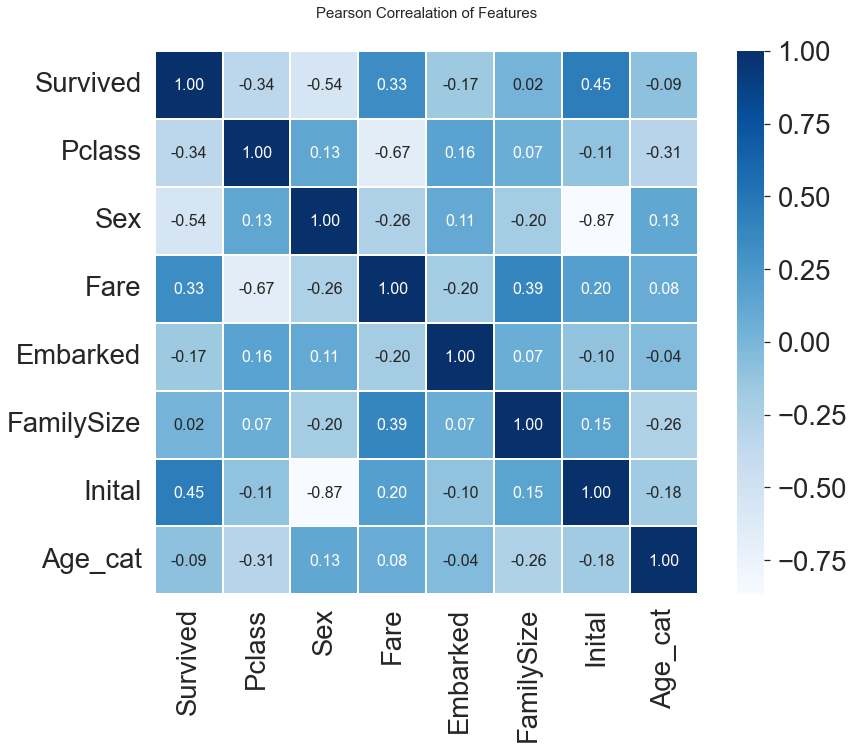

In [70]:
colormap = plt.cm.Blues
plt.figure(figsize=(14, 10))
plt.title('Pearson Correalation of Features', y=1.05, size=15)
sns.heatmap(heatmap_data.astype(float).corr(), linewidths=0.1, vmax=1.0,
           square=True, cmap=colormap, linecolor='white', annot=True, annot_kws={'size':16}, fmt='.2f')

### One-Hot Encoding

In [71]:
df_train = pd.get_dummies(df_train, columns=['Inital'], prefix='Inital')
df_test = pd.get_dummies(df_test, columns=['Inital'], prefix='Inital')

In [72]:
df_train = pd.get_dummies(df_train, columns=['Embarked'], prefix='Embarked')
df_test = pd.get_dummies(df_test, columns=['Embarked'], prefix='Embarked')

### Delete needless Data

In [73]:
df_train.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin'], axis=1, inplace=True)
df_test.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin'], axis=1, inplace=True)

### Model development

In [78]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [80]:
X_train = df_train.drop('Survived', axis=1).values
target_label = df_train['Survived'].values
X_test = df_test.values

In [84]:
X_tr, X_vid, y_tr, y_vid = train_test_split(X_train, target_label, test_size=0.3, random_state=2018)

In [91]:
model = RandomForestClassifier()
model.fit(X_tr, y_tr)

RandomForestClassifier()

In [92]:
prediction = model.predict(X_vid)

In [94]:
print('총 {}명 중 {:.2f}% 정확도로 생존 맞춤'.format(y_vid.shape[0], 100*metrics.accuracy_score(prediction, y_vid)))

총 268명 중 82.46% 정확도로 생존 맞춤


In [95]:
df_train.head()

,Survived,Pclass,Sex,Fare,FamilySize,Age_cat,Inital_0,Inital_1,Inital_2,Inital_3,Embarked_0,Embarked_1,Embarked_2
0,0,3,1,1.981001,2,2,1,0,0,0,0,0,1
1,1,1,0,4.266662,2,3,0,1,0,0,1,0,0
2,1,3,0,2.070022,1,2,0,0,1,0,0,0,1
3,1,1,0,3.972177,2,3,0,1,0,0,0,0,1
4,0,3,1,2.085672,1,3,1,0,0,0,0,0,1
